# Libararies


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**ABOUT DATA:**
1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents.


# Data Pre-Processing

In [7]:
data.loc[data["MultipleLines"] == "No phone service", "MultipleLines"] = 'No'
data.loc[data["OnlineSecurity"] == "No internet service", "OnlineSecurity"] = 'No'
data.loc[data["OnlineBackup"] == "No internet service", "OnlineBackup"] = 'No'
data.loc[data["DeviceProtection"] == "No internet service", "DeviceProtection"] = 'No'
data.loc[data["TechSupport"] == "No internet service", "TechSupport"] = 'No'
data.loc[data["StreamingTV"] == "No internet service", "StreamingTV"] = 'No'
data.loc[data["StreamingMovies"] == "No internet service", "StreamingMovies"] = 'No'
data.loc[data["DeviceProtection"] == "No internet service", "DeviceProtection"] = 'No'


In [8]:
data.loc[data["TotalCharges"] == " ", "TotalCharges"] = '0'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

# EDA

In [9]:
churn = len(data[data["Churn"]=="Yes"])
no_churn = len(data[data["Churn"]=="No"])
churn_per = churn/len(data["Churn"])*100
no_churn_per = no_churn/len(data["Churn"])*100

In [10]:
churn_per,no_churn_per

(26.536987079369588, 73.4630129206304)

**Categorical Features**

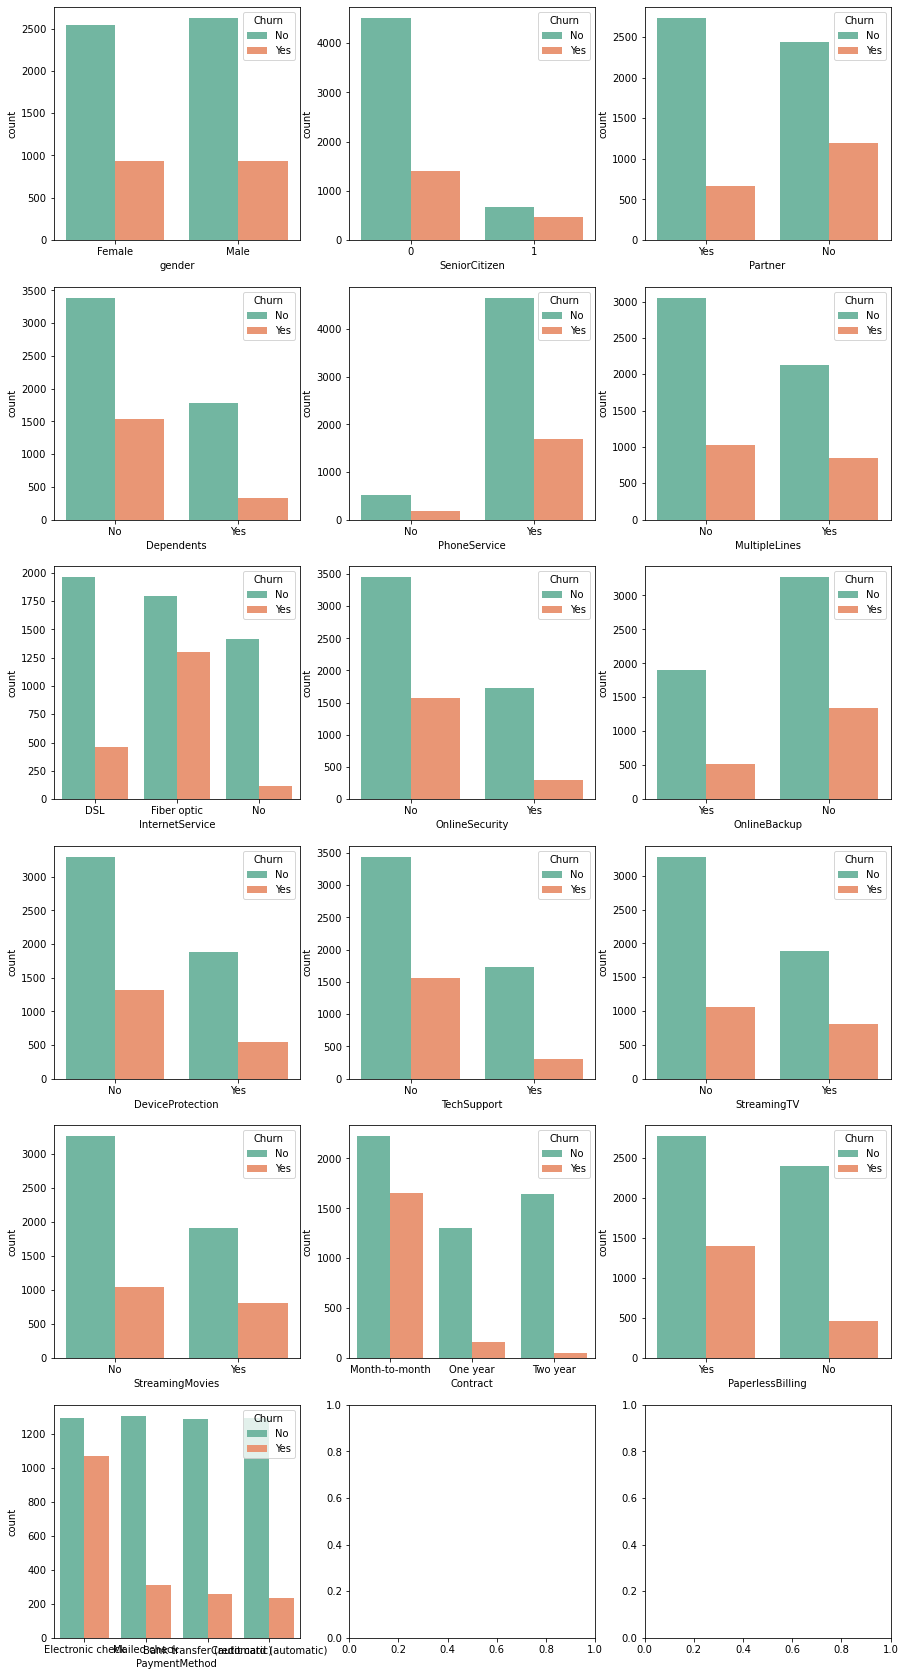

In [11]:
fig,axes=plt.subplots(6,3, figsize=(15, 30))
axes = axes.flatten()

categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']

for i in range(len(categories)):
    
    ax= sns.countplot(x=categories[i], data = data, palette = 'Set2', ax=axes[i], hue = 'Churn')

**Numerical Features**

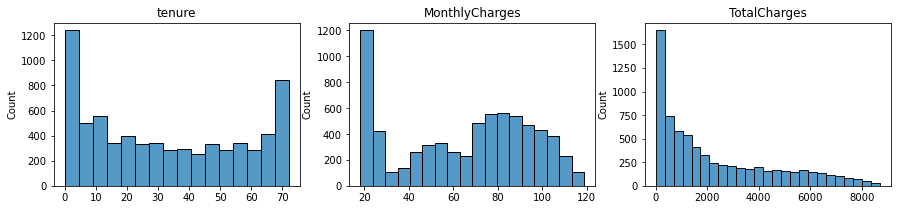

In [12]:
fig,axes=plt.subplots(1,3, figsize=(15, 3))
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

ax = sns.histplot(data['tenure'].values, ax=axes[0]).set_title('tenure')
ax = sns.histplot(data['MonthlyCharges'].values, ax=axes[1]).set_title('MonthlyCharges')
ax = sns.histplot(data['TotalCharges'].values, ax=axes[2]).set_title('TotalCharges')

**Noticeable Trends:**

1. Sensior Citizens: most customers are not Senior Citizens.
2. InternetService: higher churn rate for customers using Fiber Optic.
3. OnlineSecurity: higher churn rate for customers with no OnlineSecurity.
4. Contract: higher churn rate for customers unnder Month-to-Month Contract.


In [13]:
bins = [0,5, 10, 15, 20, 25,30,35,40,50, 55, 60, 65, 70, 80]
labels = ['5', '10', '15', '20', '25','30','35','40','50', '55', '60', '65', '70', '80']
data['Tenure_bins'] = pd.cut(data['tenure'], bins=bins, labels=labels)


bins = [18, 28, 38, 48, 58,68,78,88,98]
labels = ['28', '38', '48', '58','68','78','88','98']
data['MonthlyCharges_bins'] = pd.cut(data['MonthlyCharges'], bins=bins, labels=labels)

bins = [-10, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
labels = ['1000', '2000', '3000', '4000', '5000','6000','7000','8000','9000']
data['TotalCharges_bins'] = pd.cut(data['TotalCharges'], bins=bins, labels=labels)

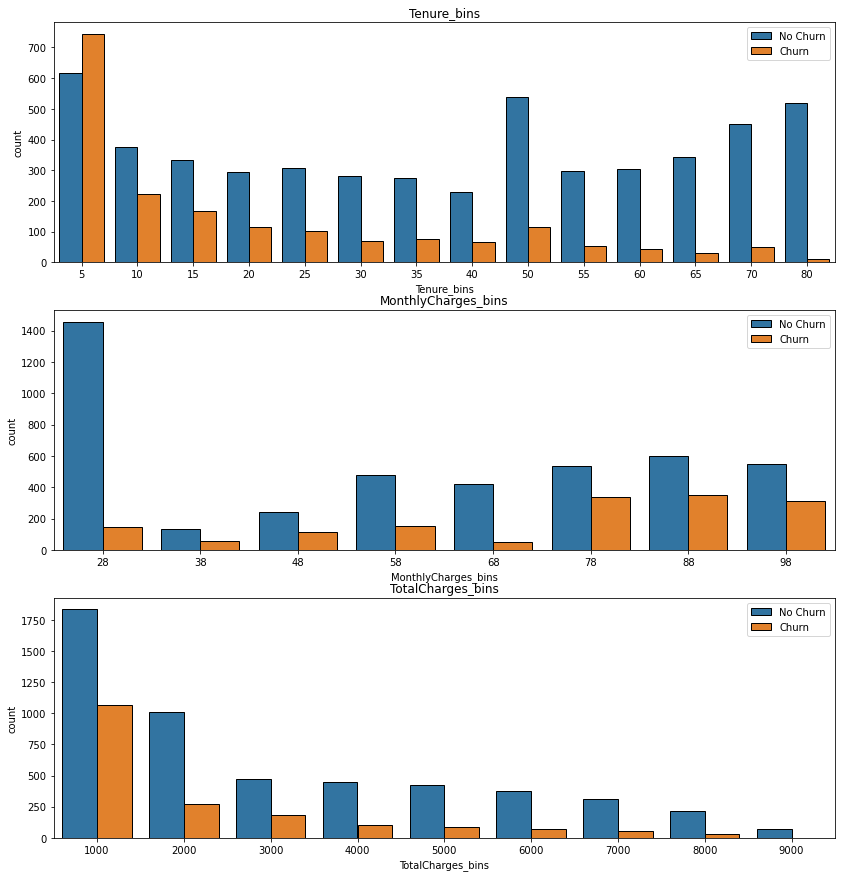

In [14]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (14,15))
numeric_feat = ['Tenure_bins', 'MonthlyCharges_bins', 'TotalCharges_bins']

for i in range(3):
    plt.subplot(3,1,i+1)
    sns.countplot(x=numeric_feat[i],data = data,hue = "Churn",edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'best')
    title = numeric_feat[i]
    plt.title(title)

**Noticeable Trend:**

1. The shorter the tenure, the more likely the user will churn.**many churned users only have 5 or lower months of tenure.**
2. The higher the charges in total or monthly, the more likely the user will churn. **Noticeable increase proportion of churned users from having to pay $78 and above**.

# Data Post-Processing.

In [15]:
from sklearn.preprocessing import LabelEncoder
df_final = data.copy()
le = LabelEncoder()

text_data_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn']

print('Label Encoder Transformation')
for i in text_data_features :
    df_final[i] = le.fit_transform(df_final[i])
    print(i,' : ',df_final[i].unique(),' = ',le.inverse_transform(df_final[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
SeniorCitizen  :  [0 1]  =  [0 1]
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [0 1]  =  ['No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 1]  =  ['No' 'Yes']
OnlineBackup  :  [1 0]  =  ['Yes' 'No']
DeviceProtection  :  [0 1]  =  ['No' 'Yes']
TechSupport  :  [0 1]  =  ['No' 'Yes']
StreamingTV  :  [0 1]  =  ['No' 'Yes']
StreamingMovies  :  [0 1]  =  ['No' 'Yes']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [16]:
data["SeniorCitizen"]=data["SeniorCitizen"].astype(str)
data["tenure"]=data["tenure"].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7043 non-null   object  
 1   gender               7043 non-null   object  
 2   SeniorCitizen        7043 non-null   object  
 3   Partner              7043 non-null   object  
 4   Dependents           7043 non-null   object  
 5   tenure               7043 non-null   object  
 6   PhoneService         7043 non-null   object  
 7   MultipleLines        7043 non-null   object  
 8   InternetService      7043 non-null   object  
 9   OnlineSecurity       7043 non-null   object  
 10  OnlineBackup         7043 non-null   object  
 11  DeviceProtection     7043 non-null   object  
 12  TechSupport          7043 non-null   object  
 13  StreamingTV          7043 non-null   object  
 14  StreamingMovies      7043 non-null   object  
 15  Contract             

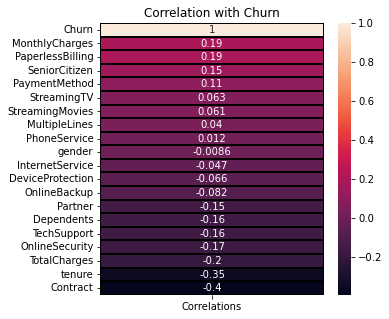

In [17]:

corr = df_final.corrwith(df_final['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation with Churn'); 

In [18]:
df_final = pd.get_dummies(df_final, columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod'], drop_first=True)



# Train - Test  And Model Evaluation

In [19]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [20]:
from xgboost import XGBClassifier


In [21]:
X = df_final.drop(['Churn','customerID','MonthlyCharges_bins','TotalCharges_bins','Tenure_bins'], axis=1)
y = df_final['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,test_size=0.30)

In [22]:
models = []
acc_lst = []
prec_lst = []
recall_lst = []
f1_lst = []


In [23]:
clf=RandomForestClassifier(n_estimators=100)
clf_fit = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

models.append("Random Forest")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))


print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))
print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.7856
Precision: 0.6404
Recall: 0.4586
F1: 0.5344

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1546
           1       0.64      0.46      0.53       567

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



In [24]:
xgb = XGBClassifier()
xgb_fit = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


models.append("XGBoost")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.7799
Precision: 0.6099
Recall: 0.4991
F1: 0.549

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1546
           1       0.61      0.50      0.55       567

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [25]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


svc = SVC(kernel='linear')
svc.fit(X_train_pca, y_train)


y_pred = svc.predict(X_test_pca)
Svc = SVC(kernel="linear")
svsfit = Svc.fit(X_train,y_train)
y_pred = Svc.predict(X_test)

models.append("SVC-linear")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.797
Precision: 0.6561
Recall: 0.5115
F1: 0.5748

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1546
           1       0.66      0.51      0.57       567

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [26]:

svc = SVC(kernel='rbf')
svc.fit(X_train_pca, y_train)


y_pred = svc.predict(X_test_pca)
Svc = SVC(kernel="rbf")
svsfit = Svc.fit(X_train,y_train)
y_pred = Svc.predict(X_test)

models.append("SVC-rbf")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.8041
Precision: 0.687
Recall: 0.4956
F1: 0.5758

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1546
           1       0.69      0.50      0.58       567

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [27]:
svc = SVC(kernel='poly')
svc.fit(X_train_pca, y_train)


y_pred = svc.predict(X_test_pca)
Svc = SVC(kernel="poly")
svsfit = Svc.fit(X_train,y_train)
y_pred = Svc.predict(X_test)

models.append("SVC-poly")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.7951
Precision: 0.6727
Recall: 0.4603
F1: 0.5466

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1546
           1       0.67      0.46      0.55       567

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [28]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train_pca, y_train)


y_pred = svc.predict(X_test_pca)
Svc = SVC(kernel="sigmoid")
svsfit = Svc.fit(X_train,y_train)
y_pred = Svc.predict(X_test)

models.append("SVC-sigmoid")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.7478
Precision: 0.534
Recall: 0.4709
F1: 0.5005

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1546
           1       0.53      0.47      0.50       567

    accuracy                           0.75      2113
   macro avg       0.67      0.66      0.67      2113
weighted avg       0.74      0.75      0.74      2113



In [29]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

models.append("SVC-sigmoid")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.7459
Precision: 0.5301
Recall: 0.4656
F1: 0.4958

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1546
           1       0.53      0.47      0.50       567

    accuracy                           0.75      2113
   macro avg       0.67      0.66      0.66      2113
weighted avg       0.74      0.75      0.74      2113



In [33]:
LR = LogisticRegression()
LR.fit(X_train_pca, y_train)

y_pred = LR.predict(X_test_pca)

models.append("LogisticRegression")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))


Accuracy: 0.8055
Precision: 0.6773
Recall: 0.5256
F1: 0.5919

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1546
           1       0.68      0.53      0.59       567

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [34]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

models.append("Naive Bayes")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))


Accuracy: 0.7544
Precision: 0.5296
Recall: 0.7566
F1: 0.6231

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1546
           1       0.53      0.76      0.62       567

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.77      2113



In [35]:
all = pd.DataFrame({'models': models,
        'accuracy': acc_lst,
        'precision': prec_lst,
        'recall': recall_lst,
        'f1': f1_lst
        },index=None)

df_result_sum = pd.DataFrame(all)
df_result_sum

,models,accuracy,precision,recall,f1
0,Random Forest,0.785613,0.640394,0.458554,0.534430
1,XGBoost,0.779934,0.609914,0.499118,0.548982
2,SVC-linear,0.796971,0.656109,0.511464,0.574827
3,SVC-rbf,0.804070,0.687042,0.495591,0.575820
4,SVC-poly,0.795078,0.672680,0.460317,0.546597
5,SVC-sigmoid,0.747752,0.534000,0.470899,0.500469
6,SVC-sigmoid,0.745859,0.530120,0.465608,0.495775
7,LogisticRegression,0.805490,0.677273,0.525573,0.591857
8,LogisticRegression,0.805490,0.677273,0.525573,0.591857
9,LogisticRegression,0.805490,0.677273,0.525573,0.591857


**Observations:**
1. We can observe that score is quite bad espically recall scores.
2. This tells us that **model are missing a lot of actual churned users**.
3. This is **most likely due to the imbalanced dataset of having only 26% of churned user data**.

In [36]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") 
x_res, y_res = ros.fit_resample(X,y)


In [37]:
churns = len(y_res[y_res == 1])
no_churns = len(y_res[y_res == 0])
churns_perc = round(len(y_res[y_res == 1])/len(y_res)*100,1)
no_churns_perc = round(len(y_res[y_res == 0])/len(y_res)*100,1)

print('Churns: {} ({}%)'.format(churns, churns_perc))
print('No Churns: {} ({}%)'.format(no_churns, no_churns_perc))

Churns: 5174 (50.0%)
No Churns: 5174 (50.0%)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, random_state=101)
models1 = []
acc_lst1 = []
prec_lst1 = []
recall_lst1 = []
f1_lst1 = []



In [39]:
clf=RandomForestClassifier(n_estimators=100)
clf_fit = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

models1.append("Random Forest(OS)")
acc_lst1.append(accuracy_score(y_test, y_pred))
prec_lst1.append(precision_score(y_test, y_pred))
recall_lst1.append(recall_score(y_test, y_pred))
f1_lst1.append(f1_score(y_test, y_pred))


print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))
print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.8933
Precision: 0.8528
Recall: 0.9486
F1: 0.8982

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1304
           1       0.85      0.95      0.90      1283

    accuracy                           0.89      2587
   macro avg       0.90      0.89      0.89      2587
weighted avg       0.90      0.89      0.89      2587



In [40]:
xgb = XGBClassifier()
xgb_fit = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


models1.append("XGBoost(OS)")
acc_lst1.append(accuracy_score(y_test, y_pred))
prec_lst1.append(precision_score(y_test, y_pred))
recall_lst1.append(recall_score(y_test, y_pred))
f1_lst1.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.8543
Precision: 0.812
Recall: 0.9189
F1: 0.8622

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1304
           1       0.81      0.92      0.86      1283

    accuracy                           0.85      2587
   macro avg       0.86      0.85      0.85      2587
weighted avg       0.86      0.85      0.85      2587



In [41]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

models1.append("Naive Bayes")
acc_lst1.append(accuracy_score(y_test, y_pred))
prec_lst1.append(precision_score(y_test, y_pred))
recall_lst1.append(recall_score(y_test, y_pred))
f1_lst1.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.7569
Precision: 0.7303
Recall: 0.8083
F1: 0.7673

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1304
           1       0.73      0.81      0.77      1283

    accuracy                           0.76      2587
   macro avg       0.76      0.76      0.76      2587
weighted avg       0.76      0.76      0.76      2587



In [42]:
all1 = pd.DataFrame({'models': models1,
        'accuracy': acc_lst1,
        'precision': prec_lst1,
        'recall': recall_lst1,
        'f1': f1_lst1
        },index=None)

df_result_sum = pd.DataFrame(all1)
df_result_sum

,models,accuracy,precision,recall,f1
0,Random Forest(OS),0.893313,0.852838,0.948558,0.898155
1,XGBoost(OS),0.854271,0.811983,0.918940,0.862157
2,Naive Bayes,0.756861,0.730282,0.808262,0.767296
